In [93]:
from scipy.io import mmread
import pandas as pd
import anndata
import scanpy as sc
import pertpy as pt

You can download the data here: https://zenodo.org/records/5302136
Preferably, download the data via the Zendo link above rather than through the Single Cell Project, as this dataset already includes the preprocessed metadata.

In [94]:
folder = "/Users/mamba/Downloads/tascCODA_data/applications/smillie_UC/SCP259"

In [95]:
# Immune cells
imm_counts = mmread(f'{folder}/expression/Imm/gene_sorted-Imm.matrix.mtx')
imm_counts_transposed = imm_counts.transpose()
imm_genes = pd.read_csv(f'{folder}/expression/Imm/Imm.genes.tsv', header=None, sep='\t')
imm_barcodes = pd.read_csv(f'{folder}/expression/Imm/Imm.barcodes2.tsv', header=None, sep='\t')
imm_adata = anndata.AnnData(X=imm_counts_transposed, obs=imm_barcodes, var=imm_genes)
imm_adata.obs_names = imm_barcodes[0].tolist()
imm_adata.var_names = imm_genes[0].tolist()

In [96]:
# Stromal cells
fib_counts = mmread(f'{folder}/expression/Fib/gene_sorted-Fib.matrix.mtx')
fib_counts_transposed = fib_counts.transpose()
fib_genes = pd.read_csv(f'{folder}/expression/Fib/Fib.genes.tsv', header=None, sep='\t')
fib_barcodes = pd.read_csv(f'{folder}/expression/Fib/Fib.barcodes2.tsv', header=None, sep='\t')
fib_adata = anndata.AnnData(X=fib_counts_transposed, obs=fib_barcodes, var=fib_genes)
fib_adata.obs_names = fib_barcodes[0].tolist()
fib_adata.var_names = fib_genes[0].tolist()

In [97]:
# Epithelial cells
epi_counts = mmread(f'{folder}/expression/Epi/gene_sorted-Epi.matrix.mtx')
epi_counts_transposed = epi_counts.transpose()
epi_genes = pd.read_csv(f'{folder}/expression/Epi/Epi.genes.tsv', header=None, sep='\t')
epi_barcodes = pd.read_csv(f'{folder}/expression/Epi/Epi.barcodes2.tsv', header=None, sep='\t')
epi_adata = anndata.AnnData(X=epi_counts_transposed, obs=epi_barcodes, var=epi_genes)
epi_adata.obs_names = epi_barcodes[0].tolist()
epi_adata.var_names = epi_genes[0].tolist()

In [98]:
# Check the datasets
print(imm_adata)
print(fib_adata)
print(epi_adata)

AnnData object with n_obs × n_vars = 210614 × 20529
    obs: 0
    var: 0
AnnData object with n_obs × n_vars = 31872 × 19076
    obs: 0
    var: 0
AnnData object with n_obs × n_vars = 123006 × 20028
    obs: 0
    var: 0


In [99]:
# Merge the three datasets
imm_adata.obs['Origin'] = 'Imm'
fib_adata.obs['Origin'] = 'Fib'
epi_adata.obs['Origin'] = 'Epi'
adata = anndata.concat([imm_adata, fib_adata, epi_adata])
adata.obs.drop(columns=0, inplace=True)
print(adata)

AnnData object with n_obs × n_vars = 365492 × 18172
    obs: 'Origin'


In [100]:
# Load and save metadata
meta = pd.read_csv(f'{folder}/metadata/meta_processed.csv')
print(meta.shape)
meta.head()

(365492, 13)


,NAME,Subject,Sample,Location,Replicate,Health,Cluster,nGene,nUMI,Major_l1,Major_l2,Major_l3,Major_l4
0,N10.EpiA.AAACATACAACCAC,N10,EpiA,Epi,A,Healthy,Enterocyte Progenitors,425,968,Epithelial,Epithelial,Absorptive,Immature cells
1,N10.EpiA.AAACATACAGGCGA,N10,EpiA,Epi,A,Healthy,Cycling TA,1695,7273,Epithelial,Epithelial,Cycling TA3,Cycling TA4
2,N10.EpiA.AAACATACCACTAG,N10,EpiA,Epi,A,Healthy,Immature Goblet,391,1190,Epithelial,Epithelial,Secretory,Progenitor cells
3,N10.EpiA.AAACATACCCTTTA,N10,EpiA,Epi,A,Healthy,Secretory TA,1327,5620,Epithelial,Epithelial,Secretory,Progenitor cells
4,N10.EpiA.AAACATACTGCAAC,N10,EpiA,Epi,A,Healthy,Immature Enterocytes 2,1383,4676,Epithelial,Epithelial,Absorptive,Immature cells


In [101]:
# Add processed metadata to adata
for col in meta.columns:
    print(col)
    if col == 'NAME':
        continue

    for i, row in meta.iterrows():
        adata.obs.loc[row['NAME'], col] = row[col]

NAME
Subject
Sample
Location
Replicate
Health
Cluster
nGene
nUMI
Major_l1
Major_l2
Major_l3
Major_l4


         Falling back to preprocessing with `sc.pp.pca` and default params.


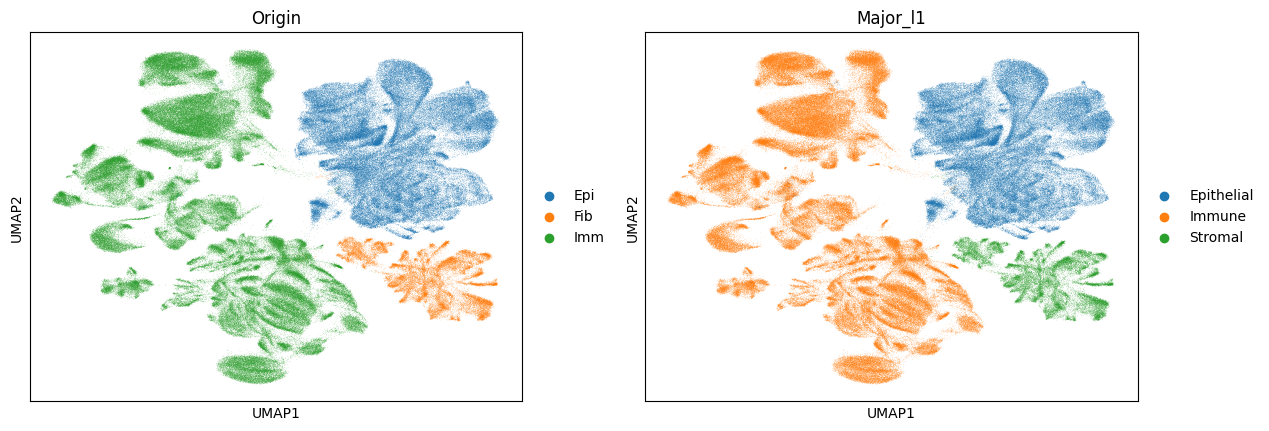

In [102]:
# To make sure, all obs-variables have been assigned correctly, we test it with the following:
log_norm_adata = adata.copy()
sc.pp.normalize_total(log_norm_adata)
sc.pp.log1p(log_norm_adata)
sc.pp.neighbors(log_norm_adata)
sc.tl.umap(log_norm_adata)
sc.pl.umap(log_norm_adata, color=['Origin', 'Major_l1'])

In [103]:
adata.obs

,Origin,Subject,Sample,Location,Replicate,Health,Cluster,nGene,nUMI,Major_l1,Major_l2,Major_l3,Major_l4
N7.EpiA.AAGGCTACCCTTTA,Imm,N7,EpiA,Epi,A,Non-inflamed,Plasma,624.0,7433.0,Immune,Lymphoid,B cells,Plasma4
N7.EpiA.AAGGTGCTACGGAG,Imm,N7,EpiA,Epi,A,Non-inflamed,CD8+ IELs,558.0,1904.0,Immune,Lymphoid,T cells,CD8+ T
N7.EpiA.AAGTAACTTGCTTT,Imm,N7,EpiA,Epi,A,Non-inflamed,CD8+ IELs,437.0,1366.0,Immune,Lymphoid,T cells,CD8+ T
N7.EpiA.ACAATAACCCTCAC,Imm,N7,EpiA,Epi,A,Non-inflamed,Plasma,484.0,5161.0,Immune,Lymphoid,B cells,Plasma4
N7.EpiA.ACAGTTCTTCTACT,Imm,N7,EpiA,Epi,A,Non-inflamed,CD8+ IELs,470.0,1408.0,Immune,Lymphoid,T cells,CD8+ T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
N110.LPB.TTTGGTTGTGTGGCTC,Epi,N110,LPB,LP,B,Inflamed,Immature Enterocytes 2,2553.0,11705.0,Epithelial,Epithelial,Absorptive,Immature cells
N110.LPB.TTTGGTTTCCTTAATC,Epi,N110,LPB,LP,B,Inflamed,TA 2,3234.0,16164.0,Epithelial,Epithelial,Absorptive,TA cells
N110.LPB.TTTGGTTTCTTACCTA,Epi,N110,LPB,LP,B,Inflamed,Enterocyte Progenitors,258.0,384.0,Epithelial,Epithelial,Absorptive,Immature cells
N110.LPB.TTTGTCAAGGATGGAA,Epi,N110,LPB,LP,B,Inflamed,TA 1,487.0,772.0,Epithelial,Epithelial,Absorptive,TA cells


In [107]:
# Save as h5ad
adata.write_h5ad(f'/Users/mamba/Desktop/smillie_2019.h5ad')

Next, we can try using the created dataset with tascCODA (this is just a sanity check, not actually part of the data preprocessing):

In [104]:
# Excerpt from the tutorial
tasccoda_model = pt.tl.Tasccoda()
smillie_data = tasccoda_model.load(adata, type="cell_level", cell_type_identifier="Cluster", sample_identifier=["Subject", "Sample"], covariate_obs=["Location", "Health"], levels_orig=["Major_l1", "Major_l2", "Major_l3", "Major_l4", "Cluster"], add_level_name=True)
smillie_data

MuData object with n_obs × n_vars = 365625 × 18223
  2 modalities
    rna:	365492 x 18172
      obs:	'Origin', 'Subject', 'Sample', 'Location', 'Replicate', 'Health', 'Cluster', 'nGene', 'nUMI', 'Major_l1', 'Major_l2', 'Major_l3', 'Major_l4', 'scCODA_sample_id'
    coda:	133 x 51
      obs:	'Location', 'Health', 'Subject', 'Sample'
      var:	'n_cells'
      uns:	'tree'